### Laboratorio 2
---  

Universidad Galileo  
Instituto de Investigación de Operaciones  
Maestría en Data Science  
Statistical Learning 1, sección U  
Segundo ciclo 2023

**Sergio Josué Castillo Custodio, Carnet 202300331**

#### Cargando Librerías

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargando Dataset

In [2]:
dataset=pd.read_csv('/Users/sergiocastillo/Documents/Academics/Master/Data Science/Courseware/4 Statistical Learning 1/Tareas/2/Lab2-databici.csv')

#### Descripción del Dataset

Los sistemas de renta de bicicletas se basan en kioskos que son puestos en diferentes áreas de una ciudad. En estos kioskos las personas pueden suscribirse, rentar y devolver las bicicletas.

Esto permite que el usuario rente un bicicleta y la pueda devolver en otro lado.

##### Descripción de variables

**instant**: *instant* - works as row ID
**datetime**: *dteday*  - hourly date + timestamp  
**season**: *season* -  
&emsp;* 1 = spring,  
&emsp;* 2 = summer,  
&emsp;* 3 = fall,  
&emsp;* 4 = winter  
**year**: *yr* - number of year within dataset  
**month**: *mnth* - number of month within dataset  
**hour**: *hr* - number of hour within dataset  
**holiday**: *holiday* - whether the day is considered a holiday  
**weekday**: *weekday* - number of day in a week
**workingday**: *workingday* - whether the day is neither a weekend nor holiday  
**weather**: *wheathersit* -  
&emsp;* 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
&emsp;* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
&emsp;* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
&emsp;* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**temperature**: *temp* - temperature in Celsius  
**thermal sensation**: *atemp* - “feels like” temperature in Celsius  
**humidity**: *hum* - relative humidity  
**windspeed**: *windspeed* - wind speed  
**casual**: *casual* - number of non-registered user rentals initiated  
**registered**: *registered* - number of registered user rentals initiated  
**count**: *cnt* - number of total rentals

#### Preview del Dataset

In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Preparando Dataset

In [7]:
# Verificando existencia de valores *null*
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Al verificar el resultado de dataset.info(), podemos observar que para ninguna de las columnas hay valores *null*.

También se puede observar que las variables categóricas del dataset están almacenadas como enteros, de acuerdo a la clasificación descrita anteriormente en la sección *Descripción del Dataset*.

Para facilitar el análisis, se utilizará el data type *category* de pandas para las variables categóricas. Esta es una función exclusiva que permite tratar variables categóricas tal y como lo que estadísticamente representan: variables que toman un número límitado, usualmente fijo, de posibles valores.

Las variables *season*, *yr*, *mnth*, *hr*, *holiday*, *weekday*, *workingday*, *weathersit* se convertirán de integer a categorical de pandas.

In [8]:
# Convirtiendo variables seleccionadas a categóricas.
for col in ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']:
    dataset[col]=dataset[col].astype('category')
# Verificando si conversión se tipos de datos se realizó de forma correcta
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


Como se puede comprobar, las variables seleccionadas efectivamente ahora tienen el *data type* *'category'*.

#### Análisis Exploratorio

##### Análisis de Correlaciones

In [9]:
# Copiando DataFrame para análisis exploratorio
datasetxa=dataset
# Eliminando columnas que no se requerirán para el análisis de correlaciones
datasetxa=datasetxa.drop(columns=['instant', 'dteday'])
# Convirtiendo todo a float para incluid variables categóricas en el análisis de correlaciones
datasetxa=datasetxa.astype('Float64')

In [10]:
# Matriz de correlaciones
print('Matriz de Correlaciones')
datasetxa.corr()

Matriz de Correlaciones


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


Text(0.5, 1.0, 'Mapa de Calor de Correlaciones')

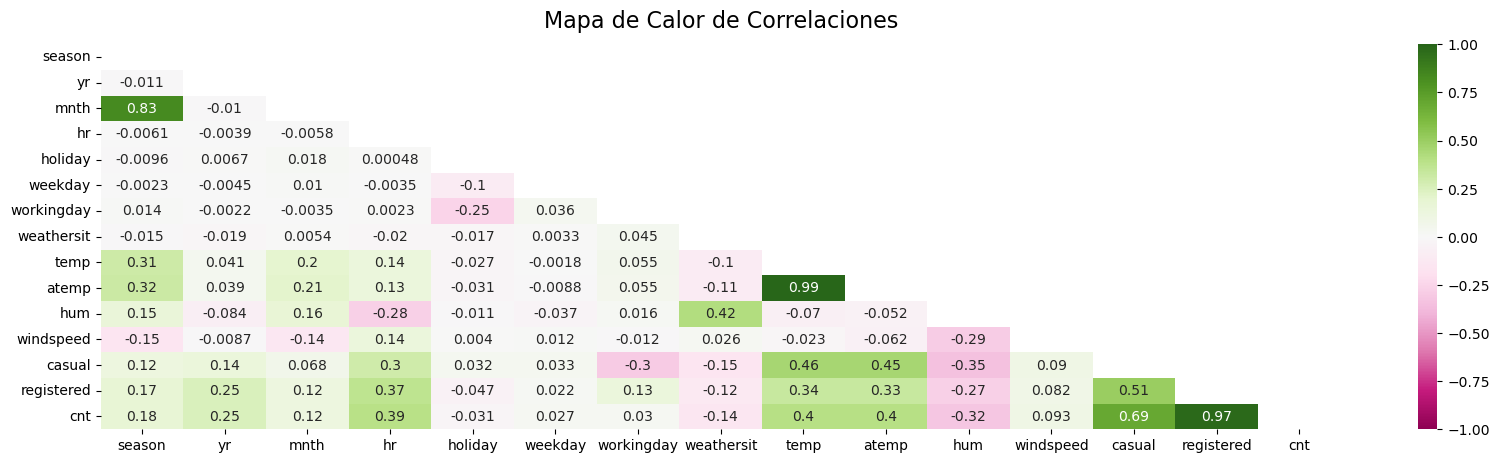

In [11]:
# Creando mapa de calor de matriz de correlaciones
plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(datasetxa.corr(), dtype=bool))
corrmap=sns.heatmap(datasetxa.corr(), mask=mask, vmin=-1, vmax=1, cmap='PiYG', annot=True)
corrmap.set_title('Mapa de Calor de Correlaciones', fontsize=16, pad=12)

**Insights**

El objetivo primordial del análisis predictivo del dataset sería obtener un módelo que prediga la demanda de bicicletas. Al evaluar el mapa de calor de correlaciones encontramos que las variables más prometedoras para ser consideradas en un modelo de predicción debido a su aparente superior poder explicativo de la demanda de bicicletas son:

*Con correlación positiva*
* Hora (hr)  
* temperatura (temp)  
* Sensación térmica (atemp)  

*Con correlación negativa*
* Humedad (hum)

No se toman en cuenta las variables de rentas casuales y registradas (casual y registered, respectivamente) debido a que con un componente de la demanda total de bicicletas.

#### Análisis

##### 1. ¿Qué rango de hora es la de mayor demanda?

In [12]:
# Guardando data agrupada por hora de la suma de registros totales de renta de bicicletas en un DataFrame
c_by_hour=pd.DataFrame(dataset.groupby('hr')['cnt'].sum())
c_by_hour.reset_index(inplace=True)
# Mostrando resultados en formato tabular
print('Demanda por hora')
c_by_hour.sort_values(by='cnt', ascending=False)

Demanda por hora


,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


Text(0.5, 1.0, 'Gráfico 1: Demanda por Hora')

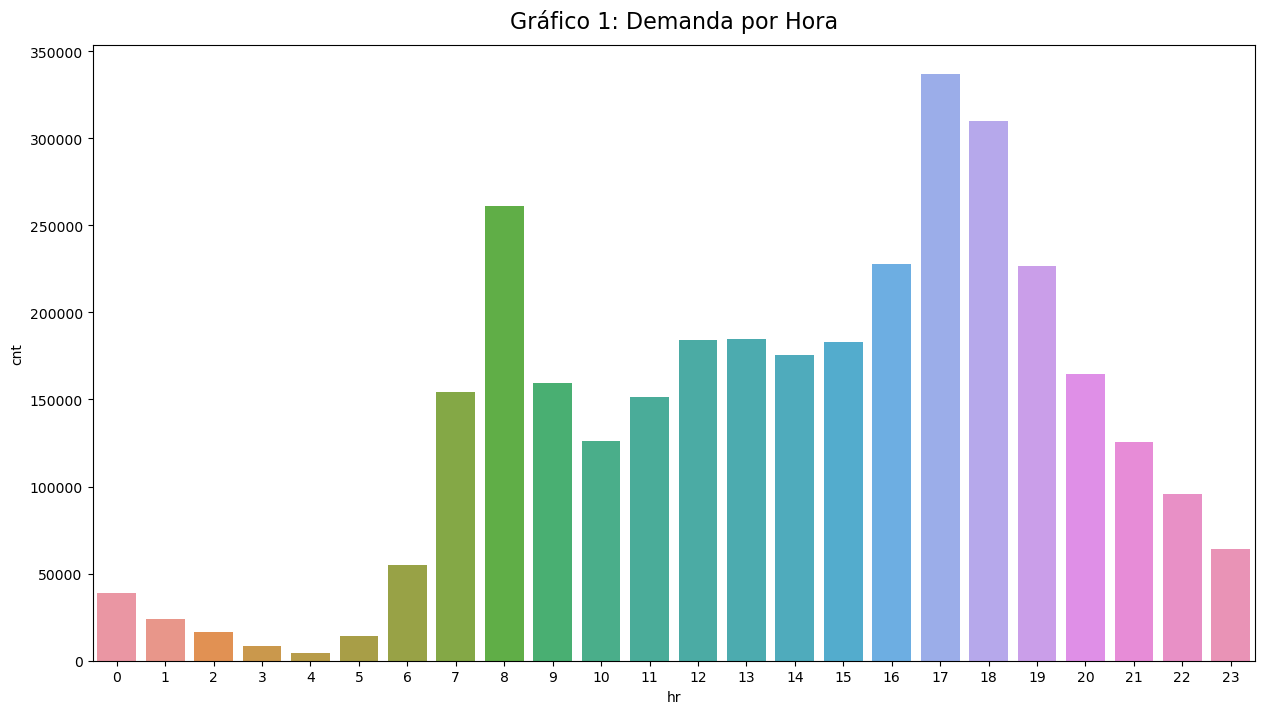

In [13]:
# Gráfica de barras para demanda por hora

# Definiendo tamaño del gráfico
plt.figure(figsize=(15, 8))

# Definiendo gráfico
graph1=sns.barplot(x='hr',y='cnt',data=c_by_hour)
graph1.set_title('Gráfico 1: Demanda por Hora', fontsize=16, pad=12)

**Respuesta**

De la gráfica se puede observar que la mayor demanda para los dos años analizados en el dataset ocurre entre 17:00 y 18:00 horas. Lo mismo se puede comprobar con los datos en formato tabular.

##### 2. ¿Qué temporada es la mas alta?

In [14]:
# Guardando data agrupada por temporada de la suma de registros totales de renta de bicicletas en un DataFrame
c_by_season=pd.DataFrame(dataset.groupby('season')['cnt'].sum())
c_by_season.reset_index(inplace=True)
# Mostrando resultados en forma tabular
print('Demanda por Temporada')
c_by_season.sort_values(by='cnt', ascending=False)

Demanda por Temporada


,season,cnt
2,3,1061129
1,2,918589
3,4,841613
0,1,471348


Text(0.5, 1.0, 'Gráfico 2: Demanda por Temporada')

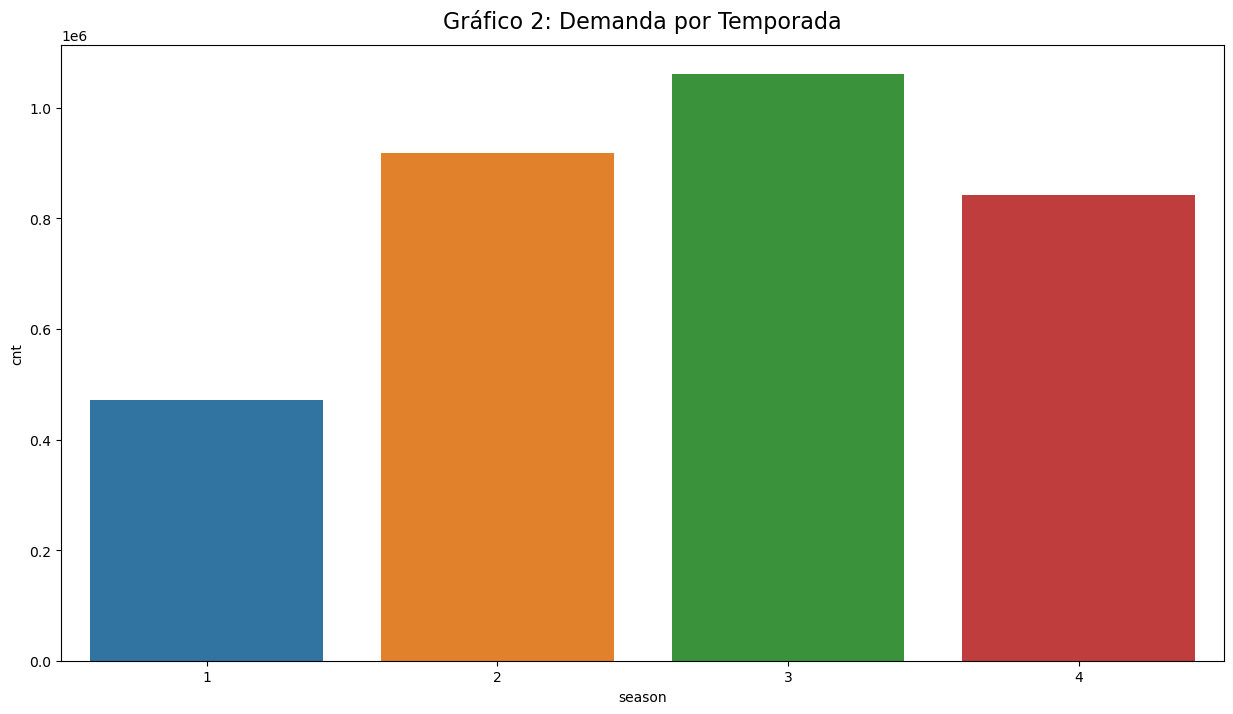

In [15]:
# Gráfica de barras para demanda por temporada

# Definiendo tamaño del gráfico
plt.figure(figsize=(15, 8))

# Definiendo gráfico
graph2=sns.barplot(x='season',y='cnt',data=c_by_season)
graph2.set_title('Gráfico 2: Demanda por Temporada', fontsize=16, pad=12)

**Respuesta**

En el gráfico 2 se muestra que la temporada 3, *fall*, es la temporada más alta, seguida de la temporada 2, *verano*.

##### 3. ¿Es la temperatura relevante para el modelo?

El enfoque utilizado para medir la relevancia de la temperatura para un módelo predictivo para la variable *cnt* consistirá en definir un modelo de regresión lineal que estime esta demanda total (*cnt*, como variable dependiente) en función de otra variable del dataset que se elegirá de entre las que se explicó en la sección de *Análisis Exploratorio* que tenían mayores posibilidades de tener un poder explicativo alto para la variable dependiente elegida: *hr*, *temp*, *atemp* y *hum*.

Se elegirá la variable *hr* como variable independiente inicial. La otras tres no se tomán en cuenta inicialmente, pues son el objeto del análisis del beneficio marginal que aportan al modelo al ser incluidas.

Como primer paso se gráfican las variables *hr* y *cnt* en un gráfico de dispersión.

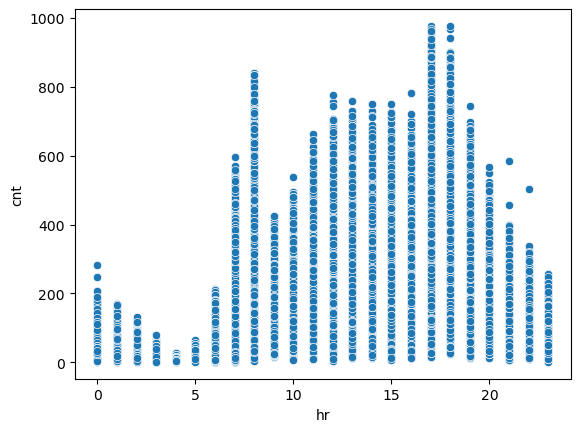

In [16]:
fig=sns.scatterplot(x='hr', y='cnt', data=dataset)

**Creando datasets de entrenamiento y prueba**

Se divide el dataset en un set de training y otro de testing.

In [17]:
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

**Módelo de Regresión Lineal uni-variable**

Como primer paso, se entrena un modelo con el dataset *train*, usando la librería sklearn.

In [18]:
from sklearn import linear_model
reg1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['hr']])
train_y = np.asanyarray(train[['cnt']])
reg1.fit (train_x, train_y)
# Coeficientes del módelo estimado
print ('Coefficients: ', reg1.coef_)
print ('Intercept: ',reg1.intercept_)

Coefficients:  [[10.4010922]]
Intercept:  [70.73290463]


El modelo obtenido se muestra en la siguiente gráfica.

Text(0, 0.5, 'cnt')

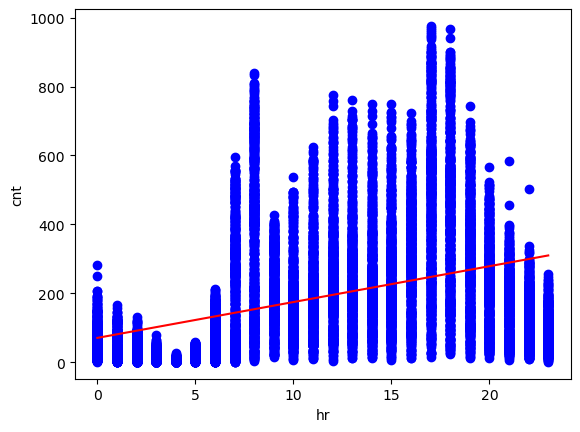

In [19]:
plt.scatter(train.hr, train.cnt,  color='blue')
plt.plot(train_x, reg1.coef_[0][0]*train_x + reg1.intercept_[0], '-r')
plt.xlabel('hr')
plt.ylabel('cnt')

El siguiente paso es validar el modelo usando el dataset de testing.

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['hr']])
test_y = np.asanyarray(test[['cnt']])
test_y_ = reg1.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Suma residual de los cuadrados (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y))

Error medio absoluto: 122.91
Suma residual de los cuadrados (MSE): 26512.88
R2-score: -4.20


**Verificando efecto de la variable *temp* en el modelo**

Se repite el proceso, pero esta vez convirtiendo el modelo en uno de regresión lineal bi-variable, en función de *hr* y *temp*. Se utilizarán los mismos datasets de training y testing ya definidos.

In [21]:
reg2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['hr', 'temp']])
train_y = np.asanyarray(train[['cnt']])
reg2.fit (train_x, train_y)
# Coeficientes del módelo estimado
print ('Coefficients: ', reg2.coef_)
print ('Intercept: ',reg2.intercept_)

Coefficients:  [[  9.1150687  335.63219884]]
Intercept:  [-81.03227753]


El siguiente paso es validar el modelo usando el dataset de testing.

In [22]:
test_x = np.asanyarray(test[['hr', 'temp']])
test_y = np.asanyarray(test[['cnt']])
test_y_ = reg2.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Suma residual de los cuadrados (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y))

Error medio absoluto: 111.58
Suma residual de los cuadrados (MSE): 22272.57
R2-score: -1.41


**CONCLUSIÓN**

Comparando las métricas de evaluación de ambos modelos desarrollados encontramos que todos ellos mejoran para con el módelo bi-variable, tal y como se muestra a continuación:

|Modelo|Variables independientes|Variable dependiente|Error medio absoluto|MSE|R2-score|
|---|---|---|---|---|---|
|Uni-variable|hr|cnt|122.85|26812.15|-4.25|
|Bi-variable|hr, temp|cnt|111.56|22976.20|-1.50|

*Se concluye que la **temperatura es relevante para el modelo**.*

##### 4. ¿Es la humedad relevante para el modelo?

El principio a utilizar es el mismo que para el caso de la temperatura. Ya se conoce el modelo que relaciona *hr* y *cnt*. Se considerará ahora el caso en el que se incorpora la variable *hum* a este modelo y así crear uno bi-variable. Se utilizarán los mismos datasets de training y testing ya definidos.

In [23]:
reg3 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['hr', 'hum']])
train_y = np.asanyarray(train[['cnt']])
reg3.fit (train_x, train_y)
# Coeficientes del módelo estimado
print ('Coefficients: ', reg3.coef_)
print ('Intercept: ',reg3.intercept_)

Coefficients:  [[   8.7854973  -213.59344627]]
Intercept:  [223.3158678]


Ahora se valida el modelo usando el dataset de testing.

In [24]:
test_x = np.asanyarray(test[['hr', 'hum']])
test_y = np.asanyarray(test[['cnt']])
test_y_ = reg3.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Suma residual de los cuadrados (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y))

Error medio absoluto: 117.31
Suma residual de los cuadrados (MSE): 24664.54
R2-score: -2.62


**CONCLUSIÓN**

Realizando la comparación del modelo uni-variable con el modelo bi-variable que incorpora *hum*, nuevamente encontramos que todos ellos mejoran para con el módelo bi-variable:

|Modelo|Variables independientes|Variable dependiente|Error medio absoluto|MSE|R2-score|
|---|---|---|---|---|---|
|Uni-variable|hr|cnt|122.85|26812.15|-4.25|
|Bi-variable|hr, hum|cnt|116.99|25189.27|-2.68|

*Como se puede comprobar, la **humedad es relevante para el modelo**, aunque en menor grado en comparación con el efecto que produce incorporar la temperatura en el modelo.*

##### 5. ¿Qué condiciones serian ideales para nuestra demanda?

La forma analítica de encontrar las condiciones ideales implicaría encontrar un modelo multivariable, probablemente en función de humedad y temperatura, y realizar un análisis de optimización para encontrar los valores de las variables independientes que maximizan la demanda. Este tipo de análisis escapan del alcance del presente documento.

Se realizará un análisis exploratorio de humedad y temperatura a partir de una gráfica de densidad bi-variable.

<AxesSubplot:xlabel='temp', ylabel='hum'>

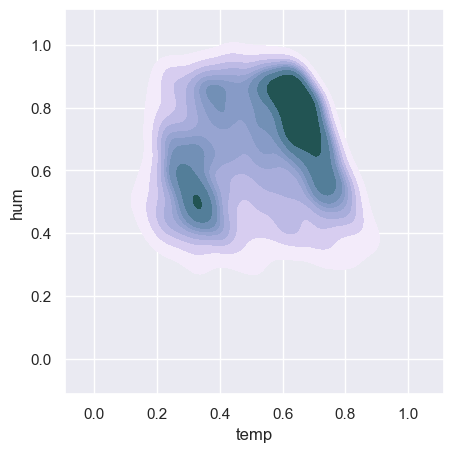

In [25]:
sns.set_theme(style='darkgrid')

# Set up the figure
f, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect("equal")

cmap = sns.cubehelix_palette(start=2.1, light=1, as_cmap=True)

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=dataset,
    x='temp',
    y='hum',
    cmap=cmap,
    fill=True,
    thresh=.1,
)

Al graficar la función de densidad bivariable de temperatura y humedad encontramos que esta tiene dos puntos máximos aproximadamente en (0.33, 0.50) y (0.64, 0.82). Estos puntos son los de mayor densidad, es decir, los que más frecuentemente se observan en términos de clima para la ciudad en la que está ubicado este servicio de renta de bicicletas. Desarrollando un modelo de regresión lineal en función de temperatura y humedad es posible encontrar una demanda de rentas de bicicletas estimada.

In [26]:
reg4 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['temp', 'hum']])
train_y = np.asanyarray(train[['cnt']])
reg4.fit (train_x, train_y)
# Coeficientes del módelo estimado
print ('Coefficients: ', reg4.coef_)
print ('Intercept: ',reg4.intercept_)

Coefficients:  [[ 362.20740932 -274.68326081]]
Intercept:  [183.192855]


Se valida el modelo con el dataset de testing.

In [27]:
test_x = np.asanyarray(test[['temp', 'hum']])
test_y = np.asanyarray(test[['cnt']])
test_y_ = reg4.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Suma residual de los cuadrados (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y))

Error medio absoluto: 113.56
Suma residual de los cuadrados (MSE): 22684.15
R2-score: -1.74


En cuanto a parámetros, este modelo es muy similar el desarrollado con las variables *hr* y *temp*. Esto refuerza el hecho de la relevancia de la temperatura para el modelo, pues la presencia de esta variable mejora los parámetros, independientemente si esta acompañada de *hr* o *hum*. Se estimará el valor de la demanda con este modelo para los valores de mayor densidad de *temp* y *hum*.

In [33]:
y1=reg4.predict([[0.33, 0.55]])
y2=reg4.predict([[0.64, 0.82]])
print(f'El valor de la demanda estimada de renta de bicicletas para una temperatura de 0.33 y humedad de 0.55 es {y1}')
print(f'El valor de la demanda estimada de renta de bicicletas para una temperatura de 0.64 y humedad de 0.82 es {y2}')

El valor de la demanda estimada de renta de bicicletas para una temperatura de 0.33 y humedad de 0.55 es [[151.64550663]]
El valor de la demanda estimada de renta de bicicletas para una temperatura de 0.64 y humedad de 0.82 es [[189.7653231]]


##### Modelo para Estimación de Demanda de Bicicletas

Hasta el momento se han desarrollado cuatro modelos de regresión lineal, uno uni-variable y tres bi-variable. A continuación se desarrolla un modelo más utilizando k-fold cross validation.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# Definiendo variables independientes y dependientes
X = dataset[['hr', 'temp']].astype(float)
y = dataset['cnt'].astype(float)

# Definiendo parámetros de validación cruzada K-fold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Seleccionando métricas deseadas de la validación cruzada K-fold
scores=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# Seleccionando modelo de regresión lineal
model = linear_model.LinearRegression()

# Utilizando validación cruzada K-fold para evaluar el modelo
results = cross_validate(model, X, y, scoring=scores, cv=cv, return_estimator=True)

# Obteniendo coeficientes promedio
coefs=pd.DataFrame(columns=['c1','c2','i'])
for model in results['estimator']:
    estimatorv=np.append(results['estimator'][0].coef_, results['estimator'][0].intercept_)
    coefs=pd.concat([coefs,pd.DataFrame(estimatorv.reshape(1,-1), columns=list(coefs))], ignore_index=True)

# Coeficientes promedio
print(f'Los coeficientes promedio son: β1={coefs.c1.mean()}, β1={coefs.c2.mean()}, β0={coefs.i.mean()}.')

# Resultados de validación cruzada K-folds
results

Los coeficientes promedio son: β1=8.9721603506801, β1=335.8859214764747, β0=-81.40213668328681.


{'fit_time': array([0.00223804, 0.00157595, 0.00145197, 0.00193691, 0.00179315]),
 'score_time': array([0.00100899, 0.00081301, 0.00108719, 0.00083613, 0.00170422]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_r2': array([0.29460196, 0.26726314, 0.28635951, 0.2686007 , 0.28303867]),
 'test_neg_mean_absolute_error': array([-113.70372614, -117.66316456, -112.95045639, -111.70802627,
        -110.97970524]),
 'test_neg_root_mean_squared_error': array([-153.40609949, -161.05687364, -153.13256234, -150.79369983,
        -150.77523666])}